# **Basic House Price Prediction**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Data Analysis

In [2]:
df=pd.read_csv(r"F:\Machine Learning all Algorithms\Day 1\Linear Regression\Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# Create a Scatter plot to find some patterns

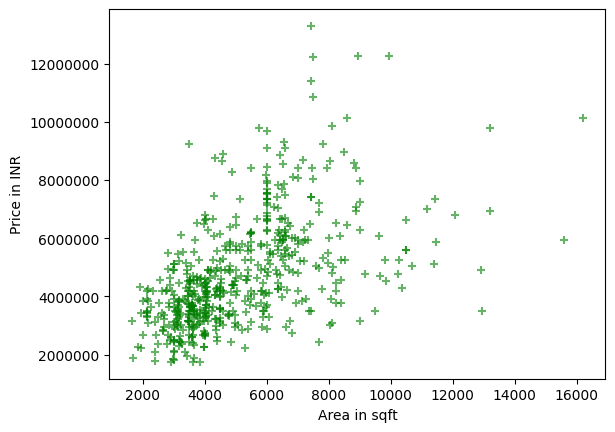

In [7]:
%matplotlib inline
plt.xlabel('Area in sqft')
plt.ylabel('Price in INR')
plt.scatter(df['area'], df['price'], color='green', marker='+', alpha=0.6)

# Disable scientific notation on the price axis, since it's being converted by matplotlib to single decimal digits
plt.ticklabel_format(style='plain', axis='y')

# Linear Regression

In [8]:
reg=linear_model.LinearRegression()


In [9]:
# fit (training the linear regresion model using the available data points)
reg.fit(df[['area']], df.price)

LinearRegression()

In [10]:
# Let's do a simple prediction ( predict the price of house whose area is 7500 sqft)
# reg.predict([[3300]]), we could use this as well but it gives us some warnings

predicted_price = reg.predict(pd.DataFrame([[7500]], columns=['area']))       # Creating a DataFrame with the same column name for prediction

print(predicted_price)

[5852120.18944231]


In [11]:
reg.coef_       # here this valus is m for referrence only

array([461.97489427])

In [12]:
reg.intercept_      # This the value for b

2387308.4823964303

In [13]:
# for referrence purpose on how we got the above  result, using formula y=m*x+b [i.e m*area+b]

461.97489427*7500+2387308.4823964303



5852120.18942143

# The above model is trained to predict prices for a given area dataset
We can try to predict prices for a new area dataset using the trained model and export the csv as predicted prices file


In [14]:
df2=pd.read_csv(r"F:\Machine Learning all Algorithms\Day 1\Linear Regression\areas file.csv")

In [15]:
df2.head()

,area
0,7420
1,8960
2,9960
3,7500
4,7420


In [16]:
# Let's use regression model to predict the prices for the areas
p=reg.predict(df2[['area']])

In [17]:
df2['prices']=p

In [18]:
df2

,area,prices
0,7420,5.815162e+06
1,8960,6.526604e+06
2,9960,6.988578e+06
3,7500,5.852120e+06
4,7420,5.815162e+06
...,...,...
540,3000,3.773233e+06
541,2400,3.496048e+06
542,3620,4.059658e+06
543,2910,3.731655e+06


In [21]:
df2.to_csv("prediction.csv", index=False)

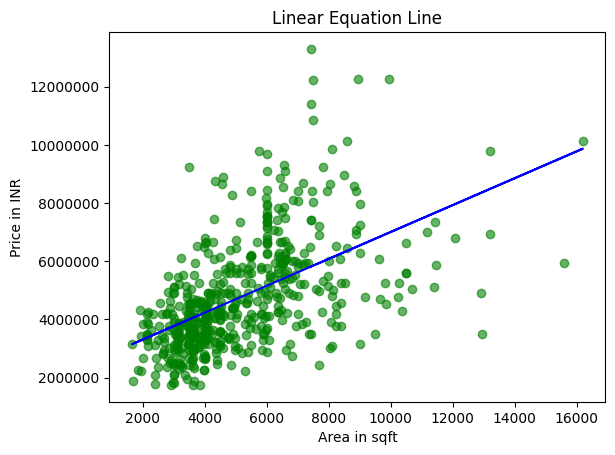

In [25]:
# To show how does the linear equation line looks like


plt.xlabel('Area in sqft')
plt.ylabel('Price in INR')
plt.title('Linear Equation Line')
plt.scatter(df['area'],df['price'], color='green', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')   #to  remove scientific notation from y-axis (price)

plt.plot(df['area'], reg.predict(df[['area']]), color='blue')  #the linear equation line